**7.44)** Refers back to Problem (7.29)

One might expect that the rotation of the wheel would have little effect on the pendulum, provided the wheel is small and rotates slowly.


**7.44(a)** Verify this expectation by solving the equation of motion numerically, with the following numbers: Take $g$ and $l$ to be 1. (This means that the natural frequency $ \sqrt{\frac{g}{l}}$ of the pendulum is also 1.) Take $\omega = 0.2$, so that the wheel's rotational frequency is small compared to the natural frequency of the pendulum; and take the radius $R=0.2$, significantly less than the length of the pendulum. As initial conditions take $\phi=0.2$ and $\dot{\phi} = 0$ at $t=0$, and make a plot of your solution $\phi (t)$ for $0<t<20$.
Your graph should look very like the sinusoidal oscillations of an ordinary simple pendulum. Does the period look correct?

Text(0, 0.5, '$\\phi (t)$')

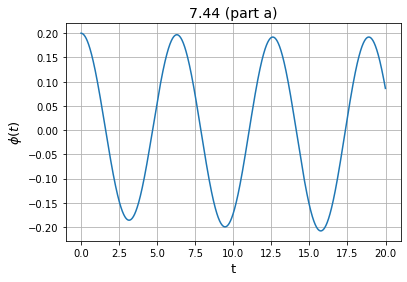

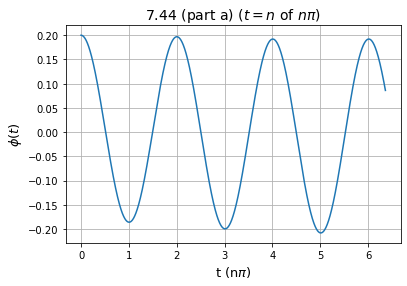

In [59]:
import numpy as np
import matplotlib.pyplot as plt

g = l = 1
omega = 0.2      #angular velocity of the wheel
R = 0.2          
phi_0 = 0.2      #initial angle of the pendulum
dphi_0 = 0       #initial angular velocity of the pendulum
tf = 20
dt = 1e-2

def dphi_dot(phi,dphi,t):
    wheel = R*(omega**2)*np.cos(dphi - omega*t)
    simple = g*np.sin(phi)
    return np.array([dphi,(wheel-simple)/l])

def pend_rk4(F,phi1,dphi1,tfinal,dt):  
    phi = []
    dphi = []
    time = []
    t = 0.0
    while t < tfinal:
        time.append(t)
        phi.append(phi1)
        dphi.append(dphi1)
        k1 = dt*F(phi1,dphi1,t)
        k2 = dt*F(phi1 + 0.5*k1[0], dphi1 + 0.5*k1[1], t+dt/2.)
        k3 = dt*F(phi1 + 0.5*k2[0], dphi1 + 0.5*k2[1], t+dt/2.)
        k4 = dt*F(phi1 + k3[0], dphi1 + k3[1], t+dt)
        phi1 = phi1 + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.                      
        dphi1 = dphi1 + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.                     
        t = t+dt
    return np.asarray(phi),np.asarray(dphi),np.asarray(time)                 #[0] = phi, [1] = dphi, [2] = time

penda = pend_rk4(dphi_dot,phi_0,dphi_0,tf,dt)
plt.figure(1)
plt.plot(penda[2],penda[0])
plt.grid()
plt.title("7.44 (part a)",fontsize=14)
plt.xlabel("t",fontsize=13)
plt.ylabel("$\phi (t)$",fontsize=13)

plt.figure(2)
plt.plot(penda[2]/np.pi,penda[0])
plt.grid()
plt.title("7.44 (part a) ($t=n$ of $n\pi$)",fontsize=14)
plt.xlabel("t (n$\pi$)",fontsize=13)
plt.ylabel("$\phi (t)$",fontsize=13)

**Comment on the period:** 
The second graph shows the graph of the oscillations with $t$ as the number of $\pi$ ($t = n$ of $n\pi$ ($\pi$,$2\pi$,etc)), seeing that one period aligns with $2\pi$ and since the oscillation motion is supposed to be similar to a simple pendulum (which typically has a period of $2\pi$), I believe the period is in fact correct.

**7.44(b)** Now plot $\phi(t)$ for $0<t<100$ and notice that the rotating that the rotating support does make a small difference, causing the amplitude of the oscillations to grow and shrink periodcally. Comment on the period of these small fluctuations.

Text(0, 0.5, '$\\phi (t)$')

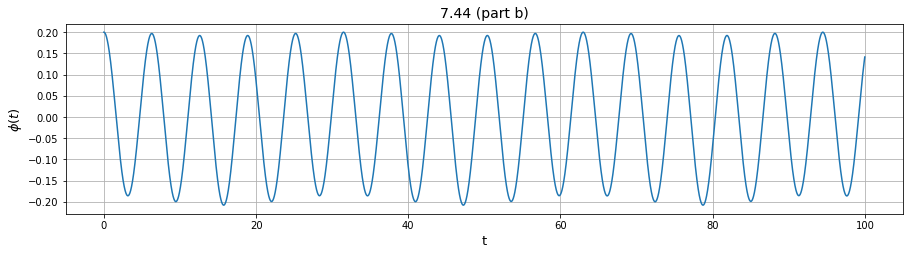

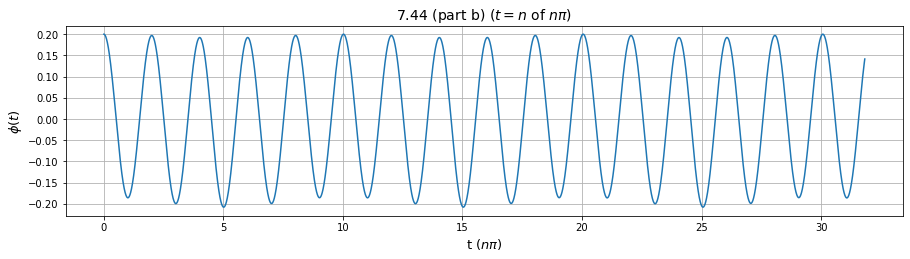

In [60]:
pendb = pend_rk4(dphi_dot,phi_0,dphi_0,100,dt)

plt.figure(1,figsize=(15,3.5))
plt.plot(pendb[2],pendb[0])
plt.grid()
plt.title("7.44 (part b)",fontsize=14)
plt.xlabel("t",fontsize=13)
plt.ylabel("$\phi (t)$",fontsize=13)

plt.figure(2,figsize=(15,3.5))
plt.plot(pendb[2]/np.pi,pendb[0])
plt.grid()
plt.title("7.44 (part b) ($t=n$ of $n\pi$)",fontsize=14)
plt.xlabel("t ($n\pi$)",fontsize=13)
plt.ylabel("$\phi (t)$",fontsize=13)

**Period of the small fluctuations:** 
The flucuations seem to have a period of about $5\pi$. Which I suppose has something to do with the period of a full rotation of the wheel.